In [1]:
# To ignore future warnings
import warnings
warnings.filterwarnings('ignore')

# Install the library used for calculating LRP
# % pip install innvestigate

import innvestigate
import innvestigate.utils as iutils

Using TensorFlow backend.


In [2]:
# virtualenv lrp_env
# source lrp_env/bin/activate
# pip install pandas, sklearn, tensorflow, keras, matplotlib
# pip install ipykernel
# python -m ipykernel install --user --name lrp_env --display-name "lrp_env"

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, Conv1D, MaxPooling2D
import keras.layers
from sklearn.metrics import roc_curve, auc, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
class dataLoader:   
    
    def __init__(self):
        pass
    
    def load_data(filename = "", column_names = [], sep = ","):
        df = pd.read_csv(filename, names = column_names, sep = sep)
        return df

In [4]:
class dataPreprocessor:
    
    def __init__(self):
        pass       
        
    def feature_target(df ,target = ""):
        data = df.drop('class', axis = 1) 
        target = pd.DataFrame(original_df[target].copy())
        return data, target
    
    def scaler(data):
        stdscaler = StandardScaler()
        return stdscaler.fit_transform(data.astype(np.float64)) 
    
    def encoder(data):
        cat_encoder = OneHotEncoder()
        return cat_encoder.fit_transform(data)
    
    def reshaper(data,x,y):
        features = len(data[0])
        return data.reshape(data.shape[0],x,y,1)

In [5]:
columns = ['id_number', 'cl_thickness', 'uni_size', 'uni_shape', 'marg_adhesion',\
               'sing_cel_size', 'bare_nuclei', 'blan_chro', 'norm_nucl', 'mitoses', 'class']
original_df = dataLoader.load_data('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',\
          columns, ",")

original_df.set_index('id_number', inplace = True)
original_df.head()

,cl_thickness,uni_size,uni_shape,marg_adhesion,sing_cel_size,bare_nuclei,blan_chro,norm_nucl,mitoses,class
id_number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
missing_rows = original_df[original_df['bare_nuclei']=="?"]
original_df.drop(missing_rows.index.values, inplace = True)

In [7]:
data, target = dataPreprocessor.feature_target(original_df, 'class')
data = dataPreprocessor.scaler (data)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    stratify = target, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the train set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the train set: 0.971
Accuracy on the test set: 0.971


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    stratify = target, random_state=42)

y_train = dataPreprocessor.encoder(y_train)
y_test = dataPreprocessor.encoder(y_test)
X_train = dataPreprocessor.reshaper(X_train,3,3)
X_test = dataPreprocessor.reshaper(X_test,3,3)

In [11]:
# Define the model
model = None
model = keras.Sequential()

model.add(Conv2D(128, (2,2), activation='relu', input_shape=(3,3,1))),
# model.add(MaxPooling2D(2))
# model.add(Conv2D(128, (2,2), activation='relu'))
# model.add(Conv2D(128, (2,2), activation='relu'))
# model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(2, input_dim = 2, activation='softmax'))  

# Compile
model.compile (loss="categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

# Train
history_callback = model.fit (X_train, y_train, epochs = 5, batch_size = 20,
           validation_data=(X_test, y_test),
           verbose = 2)

scores = model.evaluate(X_test, y_test, verbose=0)

# Evaluate the model's performance:
print('Test log loss:', scores[0])
print('Test accuracy:', scores[1])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 545 samples, validate on 137 samples
Epoch 1/5
 - 0s - loss: 0.3592 - acc: 0.9596 - val_loss: 0.1477 - val_acc: 0.9708
Epoch 2/5
 - 0s - loss: 0.1255 - acc: 0.9651 - val_loss: 0.0877 - val_acc: 0.9708
Epoch 3/5
 - 0s - loss: 0.0958 - acc: 0.9670 - val_loss: 0.0837 - val_acc: 0.9708
Epoch 4/5
 - 0s - loss: 0.0879 - acc: 0.9688 - val_loss: 0.0832 - val_acc: 0.9708
Epoch 5/5
 - 0s - loss: 0.0820 - acc: 0.9688 - val_loss: 0.0840 - val_acc: 0.9708
Test log loss: 0.08402100529005058
Test accuracy: 0.9708029197080292


In [12]:
CNN_predictions = model.predict_classes(X_test)

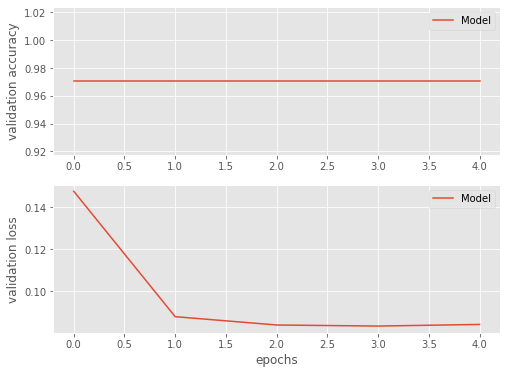

In [13]:
# Plot the accuracy
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

val_acc = history_callback.history['val_acc']
val_loss = history_callback.history['val_loss']
ax1.plot(val_acc, label="Model")
ax2.plot(val_loss, label="Model")
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

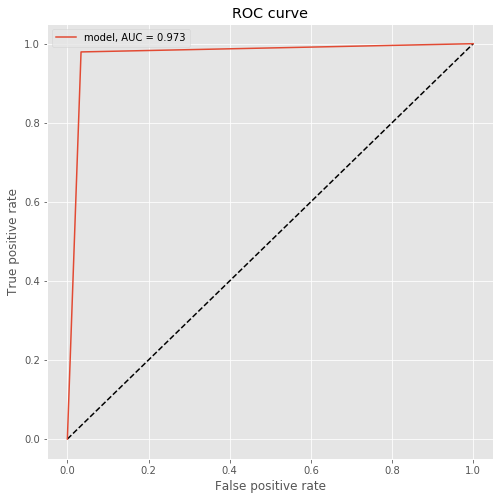

In [14]:
# Plot the ROC
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
    
y_pred = model.predict(X_test)

real = np.argmax(y_test, axis=1)
pred = np.argmax(y_pred, axis=1)

fpr, tpr, threshold = roc_curve(real, pred)

plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format("model", auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [15]:
real = np.array(real).reshape(137)
confusion = pd.crosstab(real, pred)
confusion

col_0,0,1
row_0,,
0,86,3
1,1,47


In [16]:
real = np.array(real).reshape(137)
confusion = pd.crosstab(real, pred)
confusion

col_0,0,1
row_0,,
0,86,3
1,1,47


In [17]:
# Function to output innvestigate's LRP "Alphabeta value": 
# (for other options, see 
# https://github.com/albermax/innvestigate/blob/accbb99d0da2eb47f22e3d04563c8964e2b1ad90/innvestigate/analyzer/relevance_based/relevance_analyzer.py)
# lines 36-65

def deeptaylor (instance, dataframe):
    # Stripping the softmax activation from the model
    model_wo_sm = iutils.keras.graph.model_wo_softmax(model)

    # Creating an analyzer
    #gradient_analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", model_wo_sm)
    analyzer = innvestigate.create_analyzer("deep_taylor", model_wo_sm)

    # Applying the analyzer (reshape the instance for the LRP function)
    analysis = analyzer.analyze(np.expand_dims(dataframe[instance], axis=0))
    lst = []
    x = np.reshape (analysis,(9,))
    for i in range (len(x)):
        lst.append(x[i])
    return lst

In [18]:
# Choose an instance to test:
example = 0
example = X_test[example]

model_wo_sm = iutils.keras.graph.model_wo_softmax(model)

# Creating an analyzer
gradient_analyzer = innvestigate.create_analyzer("deep_taylor", model_wo_sm)

# Applying the analyzer
analysis = gradient_analyzer.analyze(np.expand_dims(example, axis=0))

print (analysis)

[[[[0.33752817]
   [0.40618554]
   [0.23294973]]

  [[0.2473449 ]
   [0.4581829 ]
   [0.40455255]]

  [[0.12878463]
   [0.22403274]
   [0.07162203]]]]


In [19]:
# Create and save two dataframes (train and test) containing Alphabeta LRP information obtained from the 2D CNN:
def create_lrp_dataframe(train_df, train_label):
    df = pd.DataFrame(columns=columns[1:-1])
    for i in range(len(train_df)):
        df.loc[i] = deeptaylor(i, train_df)

    lst = []
    for i in train_label:
        lst.append (i.argmax())
    lst = pd.Series (lst)
    df['target'] =  lst
    
    return df

In [20]:
# Save the LRP dataframes as pickle objects
# cancer_train_LRP = create_lrp_dataframe(X_train, y_train)
cancer_test_LRP = create_lrp_dataframe(X_test, y_test)

# cancer_train_LRP.to_pickle("cancer_train_LRP_pickle.pkl")
cancer_test_LRP.to_pickle("cancer_test_LRP_pickle.pkl")

In [21]:
# Read from the pickle file in future:
cancer_test_LRP = pd.read_pickle('/home/shayan/Desktop/code/breast_cancer/cancer_test_LRP_pickle.pkl')

In [22]:
cancer_test_LRP.shape

(137, 10)

In [23]:
cancer_test_LRP.head()

,cl_thickness,uni_size,uni_shape,marg_adhesion,sing_cel_size,bare_nuclei,blan_chro,norm_nucl,mitoses,target
0,0.337528,0.406186,0.232950,0.247345,0.458183,0.404553,0.128785,0.224033,0.071622,0
1,0.134351,0.401851,0.231102,0.244494,0.455627,0.401343,0.022067,0.225646,0.071054,0
2,0.333142,0.402889,0.021909,0.244131,0.451646,0.406042,0.127111,0.221121,0.070691,0
3,0.337528,0.406186,0.232950,0.247345,0.458183,0.404553,0.128785,0.224033,0.071622,0
4,0.002106,0.012995,0.027667,0.188493,0.317409,0.271491,0.105029,0.182707,0.058410,0


In [24]:
data, target = dataPreprocessor.feature_target(original_df, 'class')
data = dataPreprocessor.scaler (data)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    stratify = target, random_state=42)

y_train = dataPreprocessor.encoder(y_train)
y_test = dataPreprocessor.encoder(y_test)

In [25]:
X_train[0]

array([-1.22128119, -0.70298082, -0.74261687, -0.64002594, -0.55614156,
       -0.69961581, -0.18196482, -0.61354557, -0.34868607])

In [26]:
# Create an array in a shape that can be used in the kNN model:
# example instance:
# [-0.9006811702978099, 1.7095946507475455, -1.2833890997091604, -1.18381211071744,..., 0]
def create_cancer_array(X_arry, y_arry):
    cancer = []
    for i in range(len(X_arry)):
        elem = list(X_arry[i])
        elem.append(y_arry[i].argmax())
        cancer.append(elem)
    return cancer

cancer_train = create_cancer_array(X_train, y_train)
cancer_test = create_cancer_array(X_test, y_test)

In [27]:
# To test the above function:
example = 14
df = pd.DataFrame()
df['1'] = cancer_test[example]
df['2'] = X_test[example].tolist() + [y_test[example].argmax()]
df

,1,2
0,1.260795,1.260795
1,1.255220,1.255220
2,1.600577,1.600577
3,0.756767,0.756767
4,0.793640,0.793640
5,1.771179,1.771179
6,2.267377,2.267377
7,2.335509,2.335509
8,-0.348686,-0.348686
9,1.000000,1.000000


In [28]:
# Create an array that combines the test data set with LRP values:
# [[attribute's LRP, attribute],...,class]

cancer_test_LRP_array = cancer_test_LRP.values.tolist()
_1 = cancer_test_LRP_array[14]
_2 = cancer_test[14]

new_list=[]
for i in range (len(_1)-1):
    lst=[]
    lst.append(_1[i])
    lst.append(_2[i])
    new_list.append(lst)
if _1[-1] == float(_2[-1]):
    new_list.append(_2[-1])

new_list

[[0.2011137753725052, 1.2607947583101071],
 [0.2597796618938446, 1.2552203498644983],
 [0.21212390065193176, 1.6005774042053083],
 [0.12308633327484131, 0.7567666769642246],
 [0.22722595930099487, 0.7936397416473479],
 [0.5288733839988708, 1.7711792568841078],
 [0.15236438810825348, 2.2673774754656333],
 [0.4741196930408478, 2.3355090122317756],
 [0.02120557427406311, -0.3486860698273789],
 1]

In [29]:
# Above cell was perfomed on one instance. Let's perform it for the whole test array:
cancer_test_plus_LRP=[]
for j in range(len(cancer_test_LRP_array)):
    _1 = cancer_test_LRP_array[j]
    _2 = cancer_test[j]
    new_list=[]
    for i in range (len(_1)-1):
        lst=[]
        lst.append(_1[i])
        lst.append(_2[i])
        new_list.append(lst)
    if _1[-1] == float(_2[-1]):
        new_list.append(_2[-1])
    cancer_test_plus_LRP.append (new_list)

In [30]:
len(cancer_test_plus_LRP)

137

In [31]:
# test and compare the newly combined array with test and LRP arrays respectively:
cancer_test_plus_LRP[40]

[[0.01601109281182289, 0.19704792305135282],
 [0.0021418710239231586, -0.05024709749743507],
 [0.02180328778922558, 0.2616092476054675],
 [0.017178935930132866, -0.6400259446585121],
 [0.4827192723751068, 2.1434210478904676],
 [0.3500171899795532, 1.7711792568841078],
 [0.00614554900676012, 0.2262588927470985],
 [0.25459256768226624, 2.007836281036122],
 [0.012478813529014587, -0.3486860698273789],
 1]

In [32]:
cancer_test_LRP_array[40]

[0.01601109281182289,
 0.0021418710239231586,
 0.02180328778922558,
 0.017178935930132866,
 0.4827192723751068,
 0.3500171899795532,
 0.00614554900676012,
 0.25459256768226624,
 0.012478813529014587,
 1.0]

In [33]:
cancer_test[40]

[0.19704792305135282,
 -0.05024709749743507,
 0.2616092476054675,
 -0.6400259446585121,
 2.1434210478904676,
 1.7711792568841078,
 0.2262588927470985,
 2.007836281036122,
 -0.3486860698273789,
 1]

In [34]:
# Create a kNN model:
# adopted from https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

import random
import math
import operator

def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
# 		distance += pow((instance1[x] - instance2[x]), 2)
# Modify the Euclidean distance formula to add the LRP as a factor
# instance1[x][0] is the LRP value of instance1[x][1]
		distance +=  instance1[x][0]*(pow((instance1[x][1] - instance2[x]), 2))
	return math.sqrt(distance)

# Find the nearest neighbors
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

# Determine the class with the majority vote
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

# Determine the accuracy of the kNN model
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

# Create confusion matrix
def create_confusion(true_class, predicted_class):
		real=[]
		for i in true_class:
			real.append(i[-1])
		print (confusion_matrix(real, predicted_class))

# Run all of the above functions
def main():
	# prepare data
	trainingSet=cancer_train #[]
# 	testSet=cancer_test #[]
	testSet=cancer_test_plus_LRP #[]
# 	split = 0.67
# 	loadDataset('iris.data', split, trainingSet, testSet)
	print ('Train set: ' + repr(len(trainingSet)))
	print ('Test set: ' + repr(len(testSet)))
	# generate predictions
	predictions=[]
	k = 3
	for x in range(len(testSet)):
		neighbors = getNeighbors(trainingSet, testSet[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
# 		print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
	accuracy = getAccuracy(testSet, predictions)
	print('Accuracy: ' + repr(accuracy) + '%')
	create_confusion(testSet,predictions)
	return predictions

In [35]:
kNN_X_test_predictions = main()

Train set: 545
Test set: 137
Accuracy: 97.8102189781022%
[[87  2]
 [ 1 47]]


In [45]:
kNN_X_test_predictions = main()

Train set: 545
Test set: 137
Accuracy: 97.8102189781022%
[[87  2]
 [ 1 47]]


In [36]:
kNN_X_test_predictions = main()

Train set: 545
Test set: 137
Accuracy: 97.8102189781022%
[[87  2]
 [ 1 47]]


In [36]:
def if_matches(x,y):
    if x==y:
        return 1
    else:
        return 0

In [37]:
matches = list(map(if_matches,CNN_predictions, kNN_X_test_predictions))
# The percentage of the CNN predictions that match those of the kNN model.
print (matches.count(1)/len(matches)*100)

99.27007299270073


In [47]:
matches = list(map(if_matches,CNN_predictions, kNN_X_test_predictions))
# The percentage of the CNN predictions that match those of the kNN model.
print (matches.count(1)/len(matches)*100)

99.27007299270073


In [38]:
matches = list(map(if_matches,CNN_predictions, kNN_X_test_predictions))
# The percentage of the CNN predictions that match those of the kNN model.
print (matches.count(1)/len(matches)*100)

99.27007299270073


In [21]:
kNN_X_test_predictions = main()

Train set: 545
Test set: 137
Accuracy: 95.62043795620438%
[[86  3]
 [ 3 45]]


In [22]:
matches = list(map(if_matches,CNN_predictions, kNN_X_test_predictions))
# The percentage of the CNN predictions that match those of the kNN model.
print (matches.count(1)/len(matches)*100)

98.54014598540147
